## Hands-on implementation of DBSCAN

Basically, clusters are highly dense data points in particular spaces which are separated by lightly dense data points, noises, or outliers. The algorithm such as K-means clustering and Hierarchical clustering works well on the structured clusters but by the application of noise or outliers, their performance gets affected. Whereas the DBSCAN groups the data based on how surrounding points are densely related to the point and it is also able to detect the noise or outliers and label such data points as -1.  

As we discussed, the DBSCAN essentially takes two parameters: the first is Eps which is the radius of the circle and the second is the min_samples I,e minimum number of neighbours to be considered with the radius. 

So to deal with this algorithm we are considering the same dataset from our previous module i,e Iris flower dataset and our task is to create the possible clusters by the application of DBSCAN. 

#### Load and read the data

As usual first we will load the data stored in a CSV file using pandas.

In [1]:
# Importing Pandas
import pandas as pd

# Read the data
data = pd.read_csv('Iris.csv')

Review the first 5 rows of the dataset.

In [2]:
# visualize the samples
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Let’s quickly check the shape of the data frame.

In [3]:
# check the shape of data
data.shape

(150, 6)

#### Defining input features

From the above output, there are 6 columns out of which we need to use 4 columns named Sepal’s length & width and Petal’s length & width to create clusters. These four columns will be used as input to the Hierarchical algorithm.  

In [4]:
# Defining input (X) features
X = data.iloc[:,1:5].values

# size of X
X.shape

(150, 4)

As we can see we have successfully created the input features set.

#### Calculating the Eps value

The Eps is referred to as epsilon which defines the neighbourhood around the selected data point so to calculate the optimal value we are using the Elbow method which is the same as we used in the K-Means clustering.  

The basic idea is to create a plot, on the x-axis number of data points and on the y-axis represent the average distance to be mentioned, the plot will be in an incremental manner. 

From this plot, we can infer that the Eps where the sudden jump is observed at a particular distance will be the optimal value of Eps.    

So before plotting the distances let’s take a look at the raw distribution of the dataset. 

Text(0, 0.5, 'Petal Length')

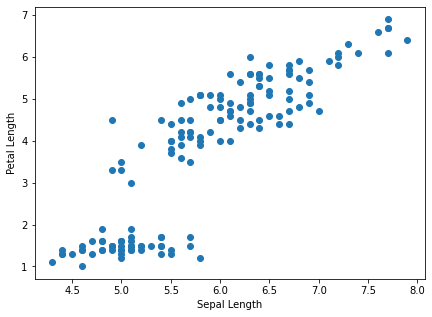

In [5]:
# How the SepalLength and PetalLength charges are distributed
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,2])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Some noise or outliers are present in our dataset, let’s see whether DBSCAN can detect those. Before that let’s calculate the distance.

In [6]:
# Grab the distance between data points
from sklearn.neighbors import NearestNeighbors
neibhours = NearestNeighbors(n_neighbors=4)
neibhours.fit(X)
distances, indices = neibhours.kneighbors(X)

In [7]:
# sort the distances 
import numpy as np
distances = np.sort(distances, axis=0)

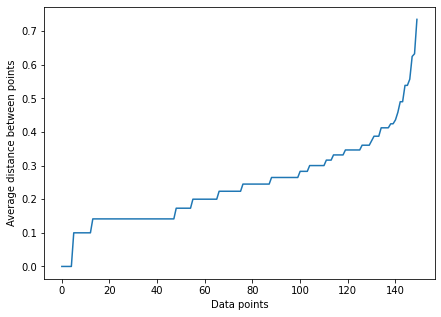

In [8]:
# plotting the distances
plt.figure(figsize=(7,5))
plt.plot(distances[:,1]) 
plt.xlabel('Data points')
plt.ylabel('Average distance between points')
plt.show()

From the above, the jump is observed around 0.6 so let’s choose the Eps to be 0.63. 

#### Initialize and train the DBSCAN

Here we will import the DBSCAN from the SK-Learn library and will initialize and train it. Out of two parameters we have calculated the Eps value, the min_points can be set equal or greater to the number of dimensions that we are using (depends on the domain knowledge).  

In [9]:
# import and initialize DBSCAN
from sklearn.cluster import DBSCAN
density_cluster = DBSCAN(eps = 0.63, min_samples=4)

# train model
density_cluster.fit(X) 

DBSCAN(eps=0.63, min_samples=4)

#### Plotting the clusters

Here first we try to understand the labels that the algorithm has assigned to our data.

In [10]:
# predicted result
data['labels'] = density_cluster.labels_

# clusters labels
data['labels'].value_counts()

 1    92
 0    50
 2     4
-1     4
Name: labels, dtype: int64

From the above, the DBSCAN made three clusters and their labels are 0,1, and 2. The data points under the -1 label are noises or outliers. 

Let’s plot these clusters.

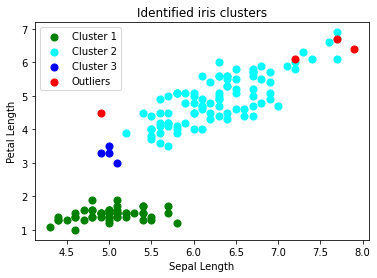

In [11]:
# plotting the clusters 
plt.scatter(X[data['labels']  == 0, 0], X[data['labels']  == 0, 2], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[data['labels']  == 1, 0], X[data['labels']  == 1, 2], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[data['labels']  == 2, 0], X[data['labels']  == 2, 2], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[data['labels']  == -1, 0], X[data['labels']  == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Identified iris clusters')
plt.legend()

In the above plot, data points in green, blue, and cyan are clusters, and data points in red are outliers or noises. 

So this is how we can address the clustering problem using the DBSCAN algorithm.